In [15]:
import cv2 as cv
from IPython.display import display
import numpy as np
from PIL import Image

In [3]:
!wget https://docs.opencv.org/4.x/opencv-logo-small.png

--2023-02-15 22:20:37--  https://docs.opencv.org/4.x/opencv-logo-small.png
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving docs.opencv.org (docs.opencv.org)... 104.21.24.86, 172.67.218.21, 2606:4700:3033::6815:1856, ...
Connecting to docs.opencv.org (docs.opencv.org)|104.21.24.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2155 (2.1K) [image/png]
Saving to: ‘opencv-logo-small.png’

opencv-logo-small.p 100%[===================>]   2.10K  --.-KB/s    in 0s      

2023-02-15 22:20:37 (59.2 MB/s) - ‘opencv-logo-small.png’ saved [2155/2155]



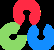

In [12]:
img = cv.imread('opencv-logo-small.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(img))

| transformation | accuruacy |
| ----------- | ----------- |
| none      | 0.575       |
| projection only   | 0.6        |
| smoothing only | 0.65|
| sharpening only | 0.525|
| clahe+fft+normalize | 0.625|
| inpaint only|0.5757|
| close only|0.725|
|dilate only|0.75|
|dilate+inpaint|0.77|
|clahe only|0.575|
|dilate+inpaint+clahe|0.694|
|dilate+inpaint+project|0.7|
|dilate+inpaint+bilateral|0.675|
|dilate+inpaint+bilat+clahe|0.7|
|dilate+inpaint+clahe gr|0.725|

- the inpaint only is drawing a lot of wrong circles so the args have to be tuned
- smoothing currently means erosion+dialation+bilateralfilter

dilate is working but leaves tiny artifacts behind which clahe picks up and amplifies

todo:
- what if we don't apply clahe to blue? we got a 
- what id we apply clahe with different args to different channels?
- dialate twice?
- dialate with larger kernel?
- global histogram equalizer
- should we try gaussian or bilateral smoothing after dilate+inpaint but before clahe?

- why was clahe only applied to b and g but not r?
- why are fft and normalize together in a single transformation?
- why was fft+normalize applied only to g and r but not b?
- inpainting struggles whenever applied before cleaning the salt and pepper noise